![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Customer Analysis Round 4
##### Isidre Munné-Bertran

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the `marketing_customer_analysis.csv` file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the `files_for_lab` folder.

### Get the data 

Use the jupyter file from the last lab (Customer Analysis Round 3)

### Complete the following task 

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

### Coding Best Practices

In [1]:
# Firstly,libraries:

import pandas as pd # data manipulation and analysis.
import numpy as np # mathematical operations
import matplotlib.pyplot as plt # plots visualizations
import seaborn as sns # HD plots graphics based on matplot
import scipy.stats as stats # statistical functions
from scipy.stats import norm # Specific method
from sklearn.preprocessing import StandardScaler # Standarize the data (normal distribution)
from sklearn.preprocessing import MinMaxScaler # Normalize the data
from sklearn import linear_model # Linear regression model
from sklearn.metrics import mean_squared_error, r2_score # test the Machine Learning model
import warnings # Lastly... no more warnings... HURRAY !!!!
warnings.filterwarnings('ignore')

In [2]:
# Defining our functions:

def explore_data():
    print("The dataframe shape is", data.shape, ".")
    print(" ")
    print("The dataframe columns are:")
    print(data.columns)
    print(" ")
    print("The dataframe data types are:")
    print(data.dtypes)

def cc(): # cleaning columns
    data.columns = cc = [column.lower().replace(' ', '_') for column in data] # standarizing the columns
    print(data.columns)
    print()

### Reading the Data

In [3]:
data = pd.read_csv('marketing_customer_analysis.csv') # Opening the Data
data.sample(5) # random sample

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
7913,IS94199,California,4254.620669,Yes,Basic,High School or Below,2/3/11,Disabled,F,11904,...,11,2,3,Personal Auto,Personal L2,Offer1,Web,292.800000,Two-Door Car,Small
772,NC58480,Nevada,4838.208972,No,Basic,Bachelor,1/23/11,Employed,F,73769,...,95,2,3,Personal Auto,Personal L3,Offer4,Web,239.540223,Four-Door Car,Medsize
2984,CV75841,California,4369.496687,No,Premium,College,1/25/11,Employed,M,97321,...,46,0,1,Personal Auto,Personal L2,Offer1,Agent,74.744643,Four-Door Car,Medsize
4723,QT61438,Oregon,6519.287872,No,Extended,Master,1/28/11,Employed,M,38795,...,41,1,3,Corporate Auto,Corporate L3,Offer1,Branch,393.600000,Two-Door Car,Small
7864,AJ69060,California,14260.914410,No,Extended,College,1/2/11,Unemployed,M,0,...,30,0,2,Personal Auto,Personal L1,Offer4,Branch,204.121476,Two-Door Car,Medsize


### Exploring the Data

In [4]:
explore_data() # First impression of our data

The dataframe shape is (9134, 24) .
 
The dataframe columns are:
Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')
 
The dataframe data types are:
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                       

### Cleaning the Data
And also, doing part of the lab:
1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [5]:
cc()

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')



In [6]:
print("The following columns are numerical")
num = data.select_dtypes(include= np.number).fillna(0) # We also deal with NaN values
print(num.columns)
print()
print("The following columns are categorical")
cat = data.select_dtypes(exclude=np.number).fillna("")
print(cat.columns)

The following columns are numerical
Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

The following columns are categorical
Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')


In [7]:
data.sample(10) # we print a larger sample to see the changes, checking for NaN values or any other error

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
8365,ET10831,Oregon,5116.727579,No,Basic,College,1/6/11,Employed,M,95427,...,85,0,5,Personal Auto,Personal L1,Offer1,Call Center,442.808018,Four-Door Car,Medsize
8012,LM63497,Oregon,2935.838245,No,Extended,College,2/6/11,Unemployed,F,0,...,35,0,1,Personal Auto,Personal L3,Offer1,Web,590.400000,Four-Door Car,Medsize
5093,PJ74689,Nevada,14741.760920,No,Extended,Bachelor,1/25/11,Unemployed,F,0,...,33,1,2,Personal Auto,Personal L3,Offer3,Call Center,667.200000,SUV,Medsize
199,MW70227,California,6047.025160,Yes,Extended,College,2/19/11,Employed,M,20396,...,60,1,4,Personal Auto,Personal L1,Offer1,Branch,364.800000,Four-Door Car,Medsize
5874,AT18041,California,2682.704812,No,Basic,High School or Below,2/28/11,Employed,F,63471,...,71,0,1,Personal Auto,Personal L1,Offer2,Agent,387.717790,Two-Door Car,Large
6995,SF29524,Oregon,4518.782768,No,Basic,Doctor,1/5/11,Retired,M,19186,...,34,0,5,Personal Auto,Personal L1,Offer3,Branch,297.600000,Four-Door Car,Small
1824,GJ43254,Washington,31642.104630,No,Extended,College,1/22/11,Employed,M,89057,...,90,0,2,Corporate Auto,Corporate L2,Offer1,Call Center,187.363583,Two-Door Car,Medsize
1048,QQ39596,Arizona,2517.533581,No,Basic,College,2/26/11,Unemployed,F,0,...,71,0,1,Personal Auto,Personal L3,Offer2,Call Center,42.096415,Four-Door Car,Medsize
1753,MB19556,California,5067.208338,No,Extended,College,1/20/11,Employed,F,29095,...,80,0,1,Personal Auto,Personal L2,Offer4,Agent,664.280864,SUV,Medsize
2729,IN91592,California,2810.671023,No,Basic,Bachelor,2/28/11,Employed,F,73858,...,59,3,1,Personal Auto,Personal L3,Offer4,Agent,422.592370,Four-Door Car,Medsize


### 2. Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 

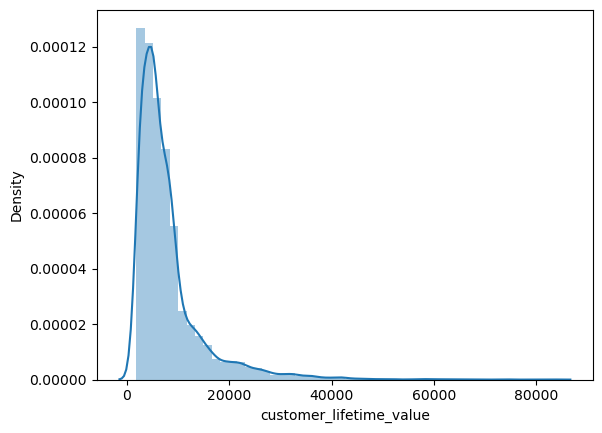

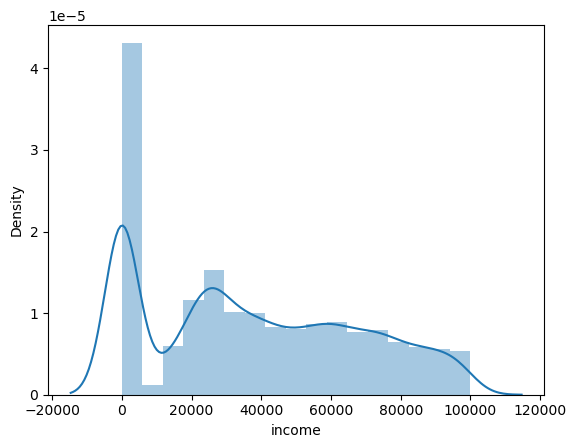

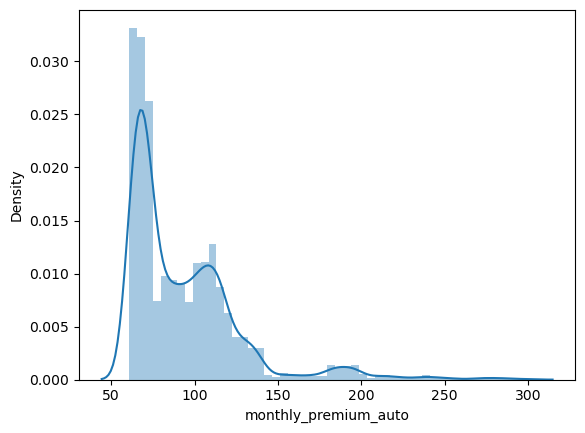

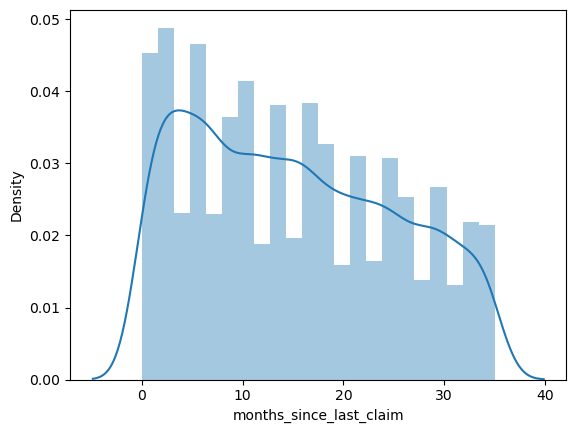

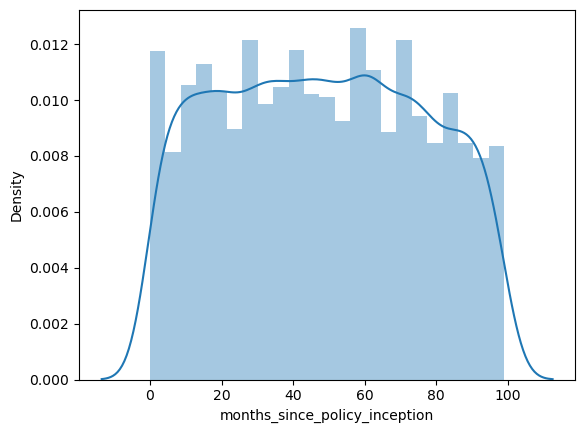

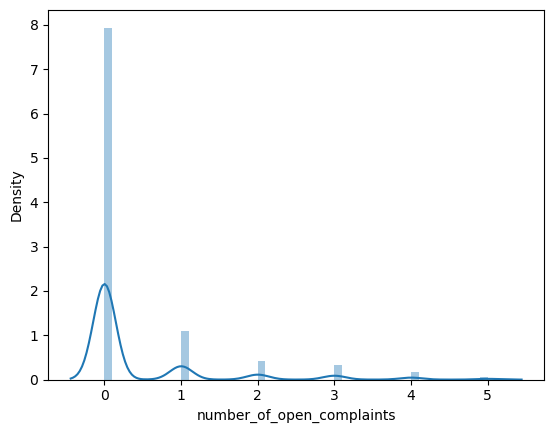

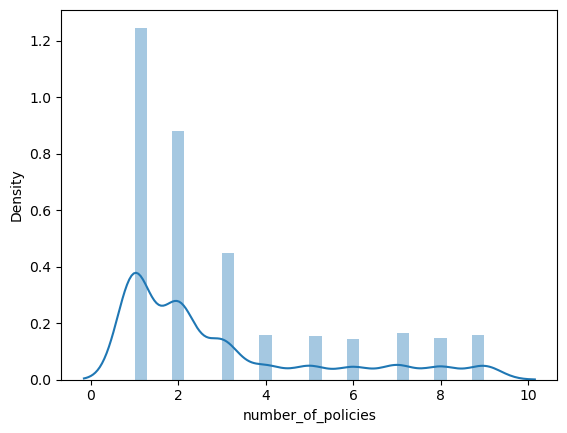

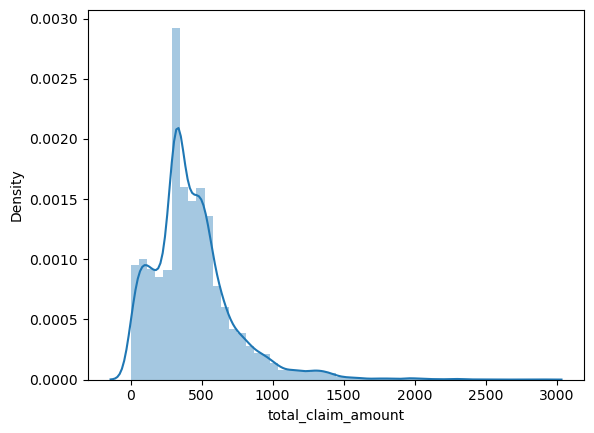

In [8]:
# Seaborn for distribution plots (only numerical)
for column in num:
    sns.distplot(num[column])
    plt.show()

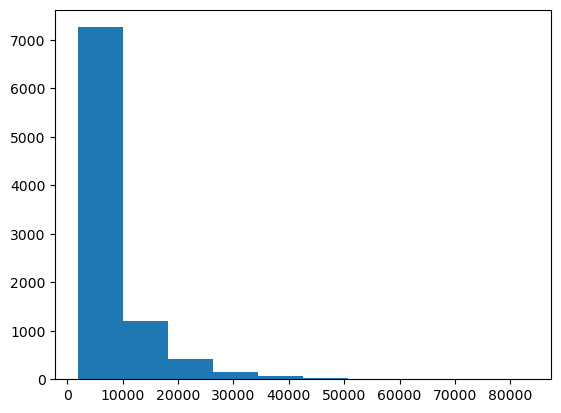

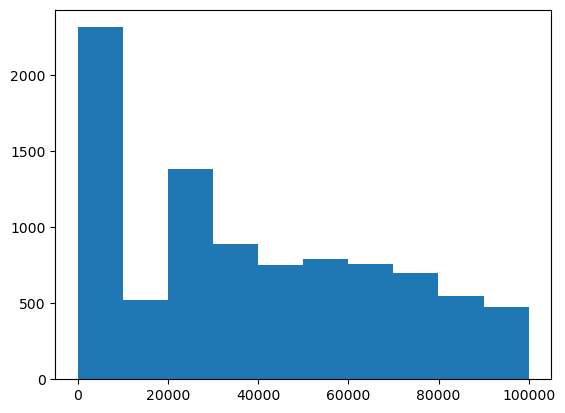

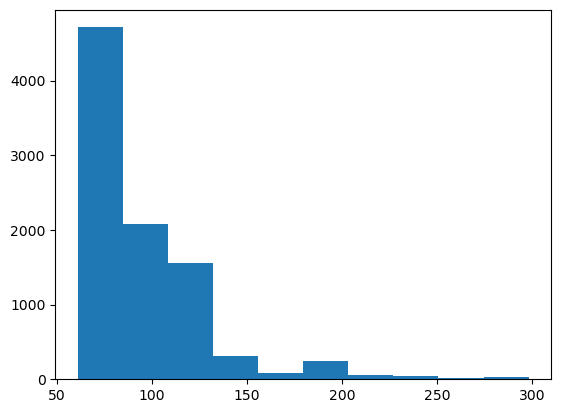

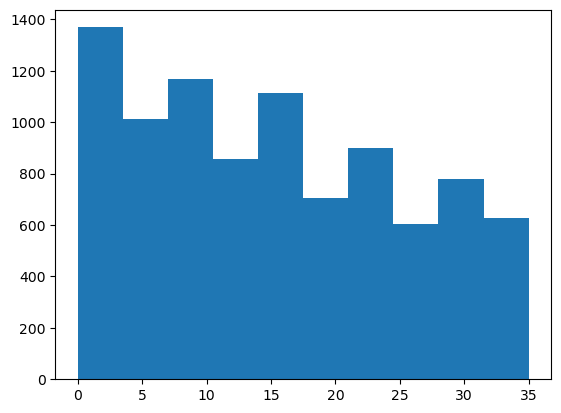

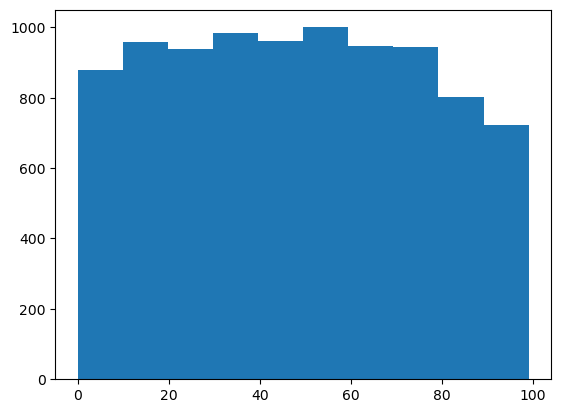

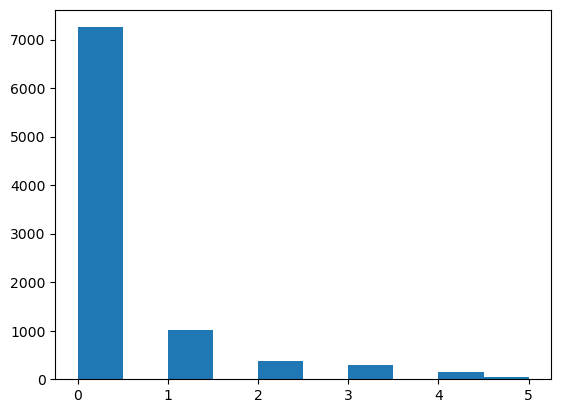

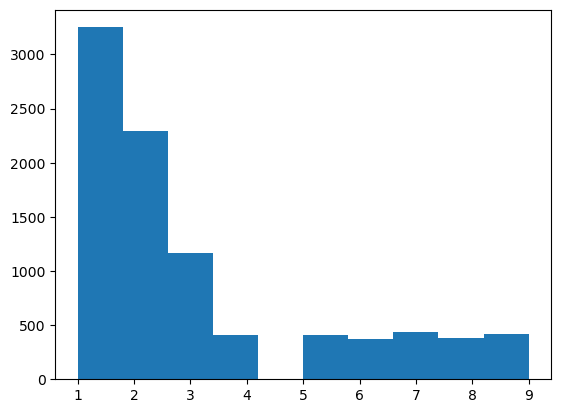

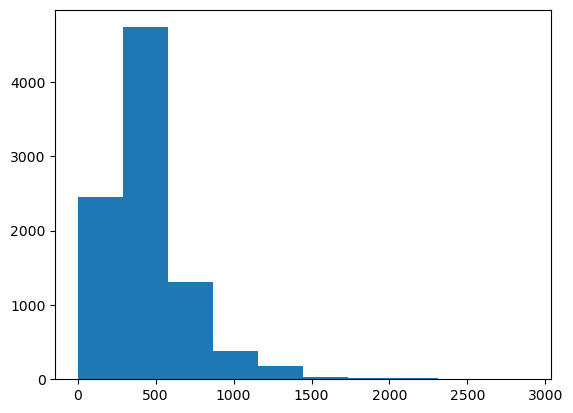

In [14]:
# Matplot for histograms
for column in num:
    plt.hist(num[column])
    plt.show()

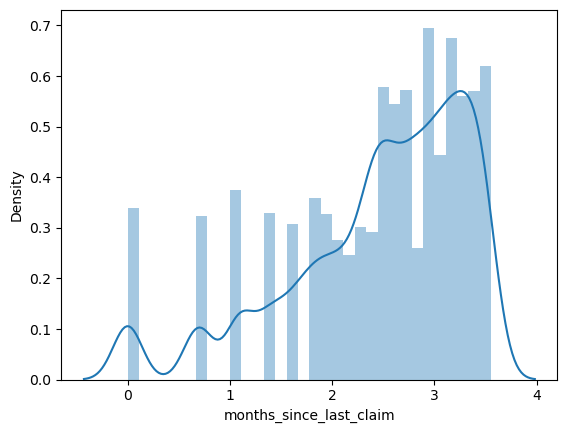

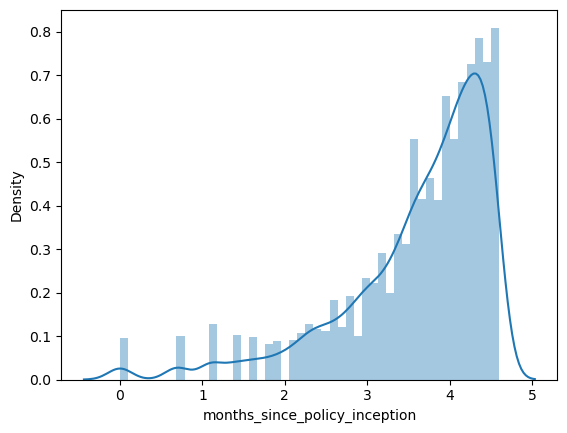

In [18]:
# Do the distributions for different numerical variables look like a normal distribution 

# We drop the that don't have a bell-shape form
num_drop = num.drop(columns=['monthly_premium_auto', 'income', 'customer_lifetime_value', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount'])

def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

for column in num_drop:
    num_drop[column] = list(map(log_transfom_clean, num_drop[column]))
    num_drop[column] = num_drop[column].fillna(np.mean(num_drop[column]))
    sns.distplot(num_drop[column])
    plt.show()

### 3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 

In [21]:
# Checking multicollinearity. AKA Checking correlation between features (to future erasing them) = We don't want biases in our model!

In [22]:
# We can show the correlation matrix
num.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [20]:
# We can use the round() function to make it less... ugly.
rc_data = num.corr()
rc_data = round(rc_data, 2)
rc_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.00,0.02,0.40,0.01,0.01,-0.04,0.02,0.23
income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01,-0.36
monthly_premium_auto,0.40,-0.02,1.00,0.01,0.02,-0.01,-0.01,0.63
months_since_last_claim,0.01,-0.03,0.01,1.00,-0.04,0.01,0.01,0.01
months_since_policy_inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01,0.00
number_of_open_complaints,-0.04,0.01,-0.01,0.01,-0.00,1.00,0.00,-0.01
number_of_policies,0.02,-0.01,-0.01,0.01,-0.01,0.00,1.00,-0.00
total_claim_amount,0.23,-0.36,0.63,0.01,0.00,-0.01,-0.00,1.00


### 4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

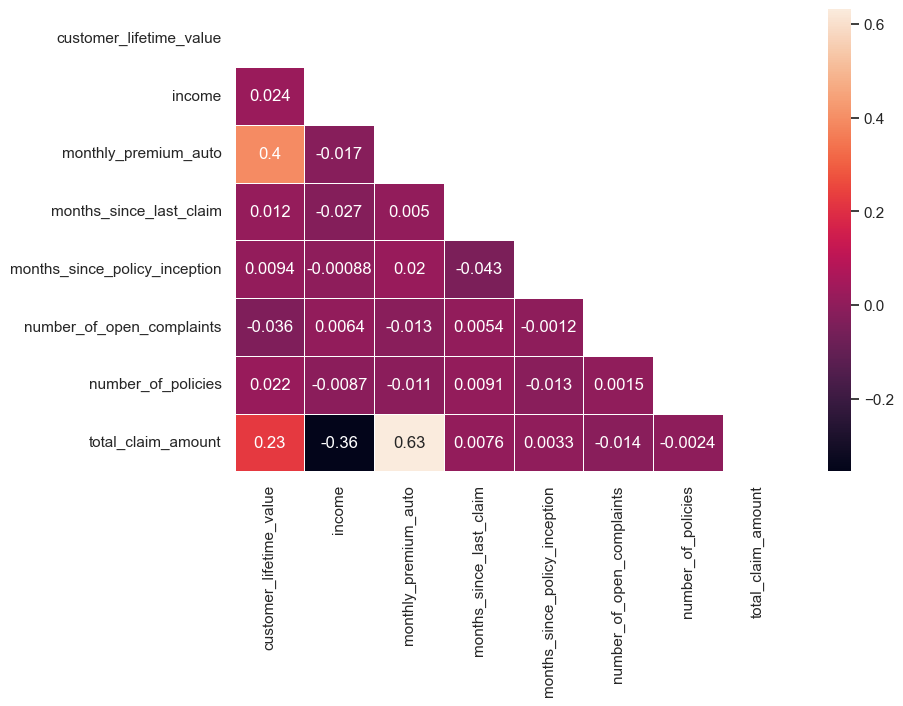

In [34]:
# How to plot seaborn heatmap
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, linewidths=.5, ax=ax)
plt.show()

<AxesSubplot:>

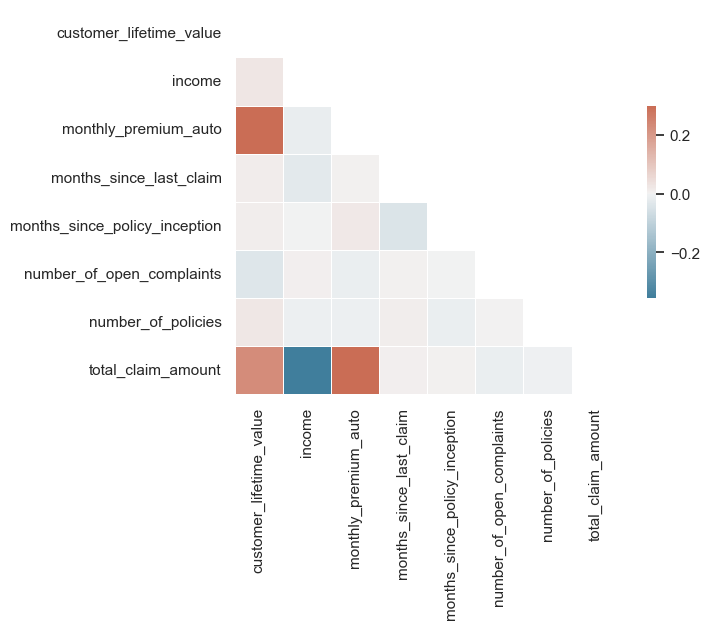

In [30]:
# How to plot the correlation matrix
sns.set_theme(style="white")

# Compute the correlation matrix
corr = num.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

There are no features that show a correlation higher than 0.9